# Importing all required packages

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from csv file

In [ ]:
df = pd.read_csv(r'\FIFA\processed_data.csv')
sns.set_style('ticks')

# EDA

### Most tournaments played

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 <a list of 10 Text major ticklabel objects>)

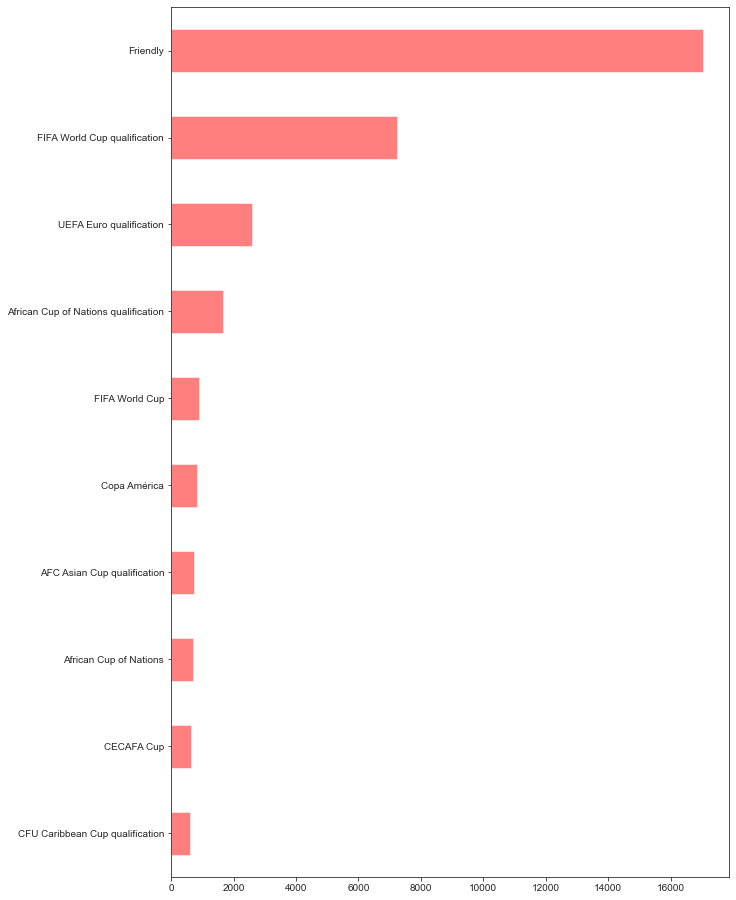

In [ ]:
plt.figure(figsize = (10,16))
df['tournament'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh',alpha=0.5,color = 'red')
plt.xticks()

### Teams won most games

Text(0.5, 1.0, 'Teams won most games')

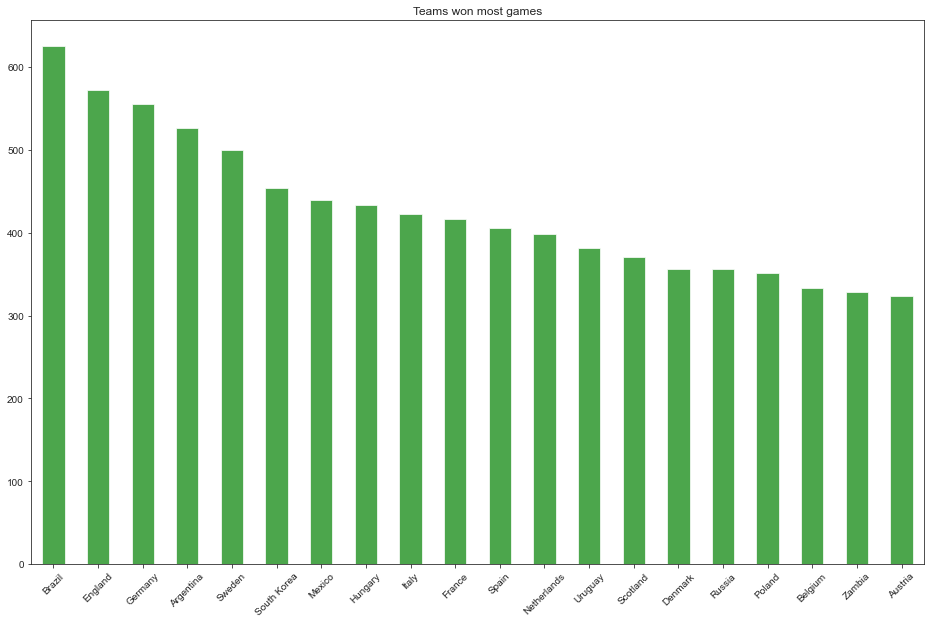

In [ ]:
plt.figure(figsize = (16,10))
ax =df['Winner'].value_counts().head(21)[1:].plot(kind = 'bar',alpha=0.7,color = 'g')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Teams won most games',loc='center')

### Teams won with most goals

Text(0.5, 1.0, 'Teams won with most goals')

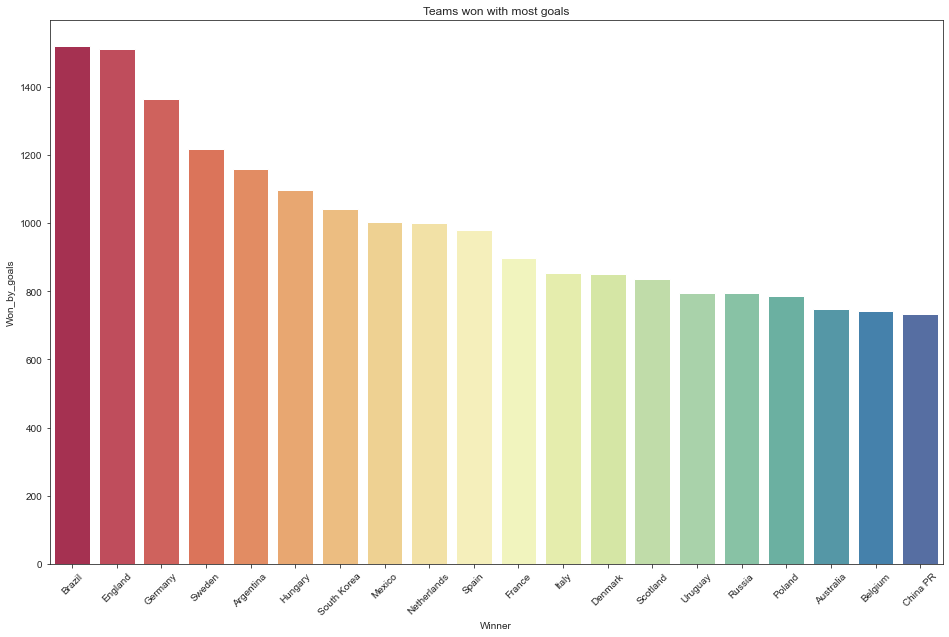

In [ ]:
table1 = pd.pivot_table(df, values='Won_by_goals', index=['Winner'], aggfunc=np.sum).sort_values(by=['Won_by_goals'],ascending=False)[:20]
plt.figure(figsize = (16,10))
ax = sns.barplot(table1.index,table1['Won_by_goals'], palette="Spectral")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Teams won with most goals',loc='center')

### Top 10 matches with most goals in Home, Away and Neutral venue

<Figure size 576x432 with 0 Axes>

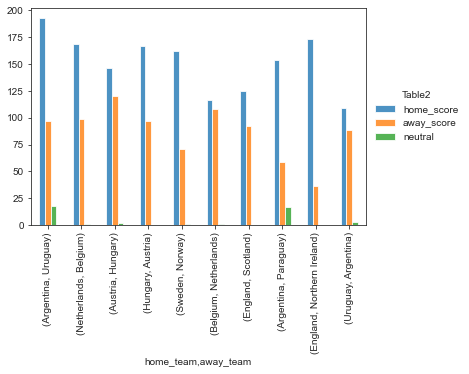

In [ ]:
table2 = pd.pivot_table(df, index=['home_team','away_team'], aggfunc=np.sum).sort_values(by=['Total_goals'],ascending=False)[['home_score','away_score','neutral']][:10]
plt.figure(figsize = (8,6))
ax = table2.plot(kind = 'bar',alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(title='Table2',loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)

### Teams with most Home/Away goals


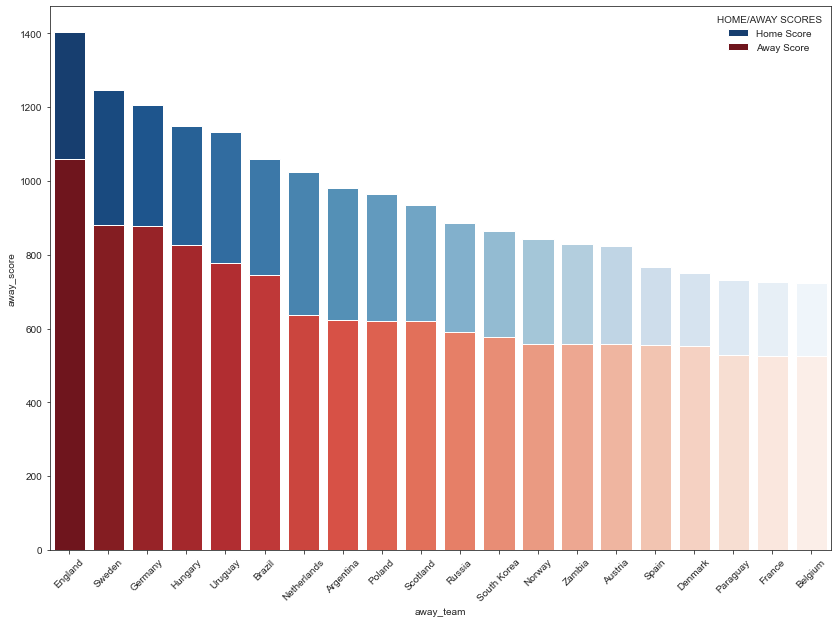

In [ ]:
Home = pd.pivot_table(df, values=['home_score'], index=['home_team'],aggfunc=np.sum).sort_values(by=['home_score'],ascending=False)[:20]
Away = pd.pivot_table(df, values=['away_score'], index=['away_team'],aggfunc=np.sum).sort_values(by=['away_score'],ascending=False)[:20]
plt.figure(figsize = (14,10))
ax = sns.barplot(Home.index,Home['home_score'], palette='Blues_r',label='Home Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = sns.barplot(Away.index,Away['away_score'], palette="Reds_r",label='Away Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='HOME/AWAY SCORES',frameon=False)


### Scatterplot - HOME vs AWAY goals since 1850:


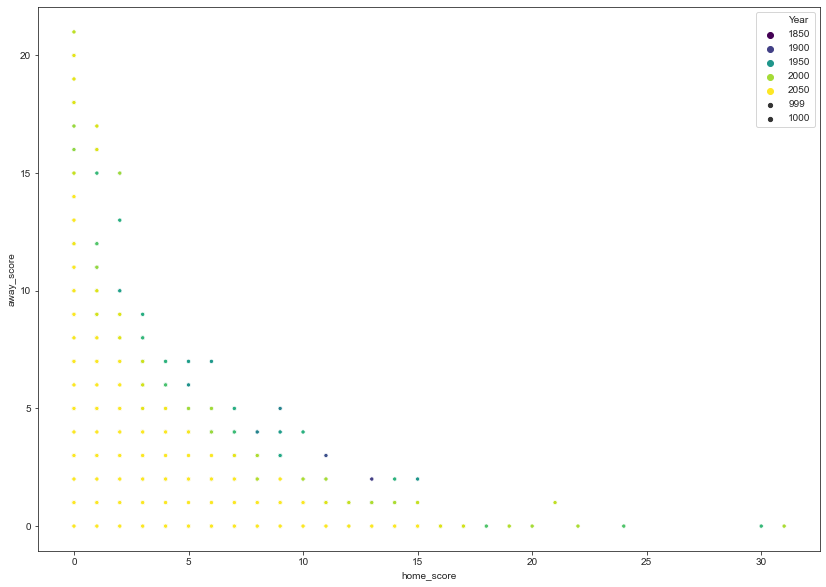

In [ ]:
plt.figure(figsize = (14,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="home_score", y="away_score", hue="Year", palette='viridis', data=df,size=1000)

### Distplot - HOME vs AWAY goals since 1850:

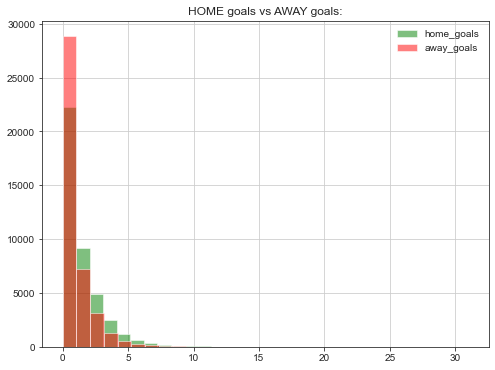

In [ ]:
plt.figure(figsize = (8,6))
df['home_score'].hist(bins=30,color='g',alpha=0.5,label='home_goals')
df['away_score'].hist(bins=20,color='r',alpha=0.5,label='away_goals')
plt.title('HOME goals vs AWAY goals:', loc = 'center')
plt.legend(frameon=False,loc='upper right')


### Neutral or not Neutral


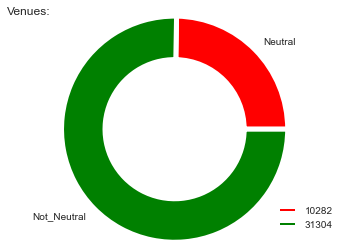

In [ ]:
group_names=['Neutral', 'Not_Neutral']
group_size=[df['neutral'].value_counts()[1],df['neutral'].value_counts()[0]]
fig, ax = plt.subplots()
ax.axis('equal')
mypie,_= ax.pie(group_size, radius=1.3, labels=group_names, wedgeprops=dict(linewidth=5), startangle=0, colors=['red','green'])
plt.setp(mypie, width=0.5, edgecolor='white')
plt.title('Venues:', loc = 'left')
plt.legend(['10282','31304'],frameon=False, loc='lower right')
plt.show()

### Tie or Not Tie


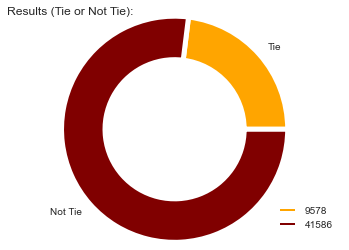

In [ ]:
group_names=['Tie', 'Not Tie']
group_size=[df[df['Winner']=='Tie'].count()[0],df['Winner'].count() - df[df['Winner']=='Tie'].count()[0]]
fig, ax = plt.subplots()
ax.axis('equal')
mypie,_= ax.pie(group_size, radius=1.3, labels=group_names, wedgeprops=dict(linewidth=5), startangle=0, colors=['orange','maroon'])
plt.setp(mypie, width=0.5, edgecolor='white')
plt.title('Results (Tie or Not Tie):', loc = 'left')
plt.legend(['9578','41586'],frameon=False, loc='lower right')
plt.show()

### Which Team won : Home or Away or Tie


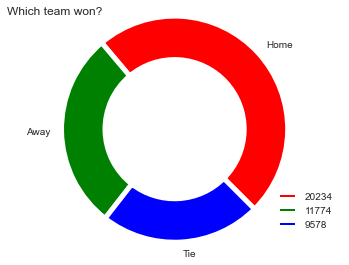

In [ ]:
group_names=['Home', 'Away', 'Tie']
group_size=[df['H/A/T'].value_counts()[0],df['H/A/T'].value_counts()[1],df['H/A/T'].value_counts()[2]]
fig, ax = plt.subplots()
ax.axis('equal')
mypie,_= ax.pie(group_size, radius=1.3, labels=group_names, wedgeprops=dict(linewidth=5), startangle=-45, colors=['red','green','blue'])
plt.setp(mypie, width=0.5, edgecolor='white')
plt.title('Which team won?', loc = 'left')
plt.legend(['20234','11774','9578'],frameon=False, loc='lower right')
plt.show()

### which country hosted most of the matches...HOSTS


Text(0.5, 1.0, 'HOSTS')

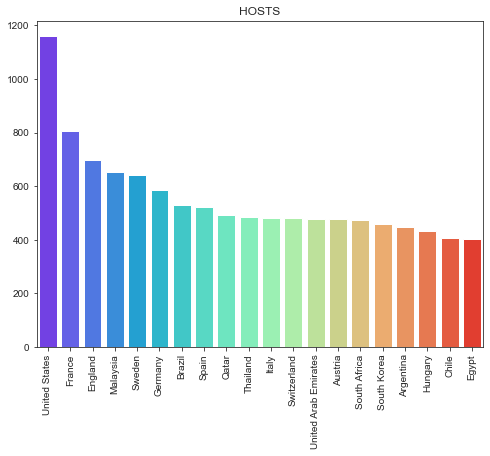

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.barplot(df['country'].value_counts().head(20).index,df['country'].value_counts().head(20).values,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('HOSTS', loc='center')

### Country and City pivoting with Total goals, Home score, Away score and Neutral


In [ ]:
table3 = pd.pivot_table(df, index=['country','city'], aggfunc=np.sum).sort_values(by=['country'],ascending=True)[['Total_goals','home_score','away_score','neutral']]
table3

Total_goals  home_score  away_score  neutral
country     city                                                  
Afghanistan Kabul              18           7          11      2.0
Albania     Berat               0           0           0      0.0
            Durrës              3           3           0      0.0
            Elbasan            32          17          15      0.0
            Korçë               0           0           0      0.0
...                           ...         ...         ...      ...
Zimbabwe    Masvingo            4           2           2      0.0
            Mutare              0           0           0      0.0
            Umtali              2           0           2      1.0
Éire        Cork                4           2           2      0.0
            Dublin             18          10           8      0.0

[2136 rows x 4 columns]

### Country and Tournament pivoting with Total goals, Home score, Away score and Neutral


In [ ]:
table4 = pd.pivot_table(df, index=['country','tournament'], aggfunc=np.sum).sort_values(by=['country'],ascending=True)[['Total_goals','home_score','away_score','neutral']]
table4


Total_goals  \
country     tournament                                                
Afghanistan FIFA World Cup qualification                          2   
            Friendly                                             16   
Albania     Balkan Cup                                           27   
            FIFA World Cup qualification                        134   
            Friendly                                            101   
...                                                             ...   
Zimbabwe    Friendly                                            161   
            African Nations Championship                          8   
            African Cup of Nations qualification                 93   
            African Nations Championship qualification            8   
Éire        Friendly                                             22   

                                                        home_score  \
country     tournament                                               
Afghanistan FIFA World Cup qualification                         0   
            Friendly                                             7   
Albania     Balkan Cup                                          12   
            FIFA World Cup qualification                        45   
            Friendly                                            70   
...                                                            ...   
Zimbabwe    Friendly                                            92   
            African Nations Championship                         7   
            African Cup of Nations qualification                67   
            African Nations Championship qualification           6   
Éire        Friendly                                            12   

                                                        away_score  neutral  
country     tournament                                                       
Afghanistan FIFA World Cup qualification                         2      0.0  
            Friendly                                             9      2.0  
Albania     Balkan Cup                                          15      2.0  
            FIFA World Cup qualification                        89      5.0  
            Friendly                                            31      0.0  
...                                                            ...      ...  
Zimbabwe    Friendly                                            69      8.0  
            African Nations Championship                         1      0.0  
            African Cup of Nations qualification                26      0.0  
            African Nations Championship qualification           2      0.0  
Éire        Friendly                                            10      0.0  

[1315 rows x 4 columns]

### Country and Tournament pivoting with Total numbers of matches and Neutral


In [ ]:
table5 = pd.pivot_table(df, index=['country','tournament'], aggfunc=np.sum).sort_values(by=['matches'],ascending=False)[['matches','neutral']]
table5

,,matches,neutral
country,tournament,,
United States,Friendly,635,423.0
France,Friendly,467,162.0
Malaysia,Merdeka Tournament,421,340.0
Germany,Friendly,332,42.0
Spain,Friendly,331,59.0
...,...,...,...
Canada,NAFU Championship,1,0.0
Cape Verde,African Nations Championship qualification,1,0.0
Guyana,Gold Cup qualification,1,0.0


### Tournament pivoting with Total numbers of matches and Neutral


In [ ]:
table6 = pd.pivot_table(df, index=['tournament'], aggfunc=np.sum).sort_values(by=['matches'],ascending=False)[['matches','neutral']]
table6

,matches,neutral
tournament,,
Friendly,17029,2265.0
FIFA World Cup qualification,7236,561.0
UEFA Euro qualification,2582,35.0
African Cup of Nations qualification,1672,28.0
FIFA World Cup,900,782.0
...,...,...
Dragon Cup,4,4.0
World Unity Cup,4,2.0
Copa América qualification,2,1.0


### Matches played per Month


Text(0.5, 1.0, 'Matches played per Month')

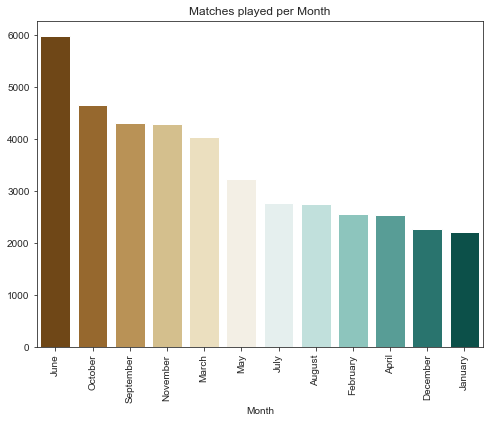

In [ ]:
table6 = pd.pivot_table(df, index=['Month'], aggfunc=np.sum).sort_values(by=['matches'],ascending=False)[['matches','neutral']]
plt.figure(figsize = (8,6))
ax = sns.barplot(table6['matches'].index,table6['matches'].values, palette='BrBG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Matches played per Month',loc='center')

### Matches played in last 20 years


Text(0.5, 1.0, 'Matches played in last 20 years')

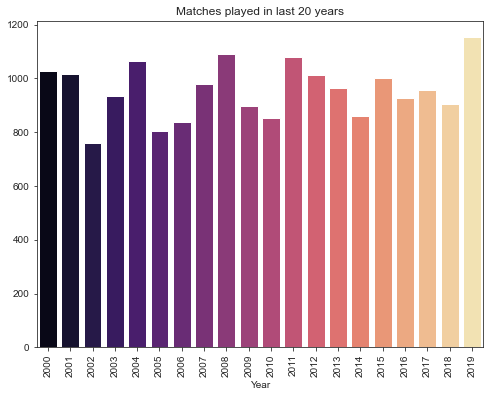

In [ ]:
table7 = pd.pivot_table(df, index=['Year'], aggfunc=np.sum).sort_values(by=['Year'],ascending=False)[['matches','neutral']]
plt.figure(figsize = (8,6))
ax = sns.barplot(table7[1:21]['matches'].index,table7[1:21]['matches'].values, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Matches played in last 20 years',loc='center')

### Matches tied per Month


Text(0.5, 1.0, 'Matches tied per Month')

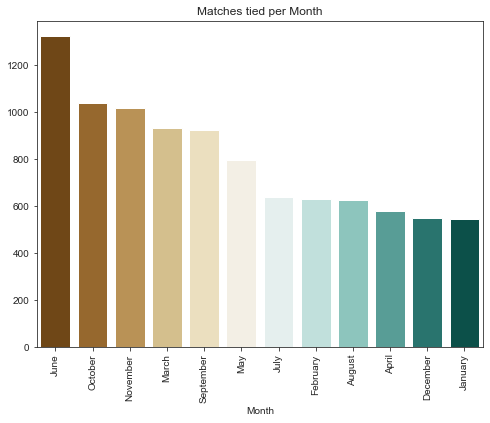

In [ ]:
table8 = pd.pivot_table(df, index=['Month'], aggfunc=np.sum).sort_values(by=['Tie'],ascending=False)['Tie']
plt.figure(figsize = (8,6))
ax = sns.barplot(table8.index,table8.values, palette='BrBG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Matches tied per Month',loc='center')

### Top 20 years with match result is a Tie


Text(0.5, 1.0, 'Top 20 years with match result is a Tie')

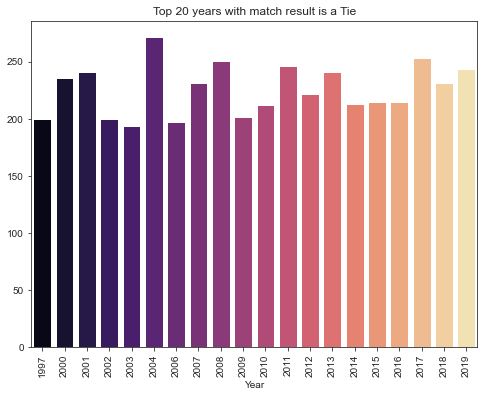

In [ ]:
table9 = pd.pivot_table(df, index=['Year'], aggfunc=np.sum).sort_values(by=['Tie'],ascending=False)['Tie']
plt.figure(figsize = (8,6))
ax = sns.barplot(table9[0:20].index,table9[0:20].values, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top 20 years with match result is a Tie',loc='center')

### Mean value of Home and Away goals

In [ ]:
print(df[['home_score','away_score']].mean())

home_score    1.745756
away_score    1.187587
dtype: float64


## Considering Important tournaments: 
    FIFA World Cup qualification, 
    UEFA Euro  qualification, 
    African Cup of Nations, 
    FIFA World Cup, 
    UEFA Euro, 
    UEFA Nations League, 
    African Cup of Nations qualification, 
    Copa América

In [ ]:
df_main = pd.DataFrame()
Imp_Tournaments = ['FIFA World Cup qualification', 'UEFA Euro qualification', 'African Cup of Nations', 'FIFA World Cup', 'UEFA Euro', 'UEFA Nations League', 'African Cup of Nations qualification', 'Copa América']
for i in Imp_Tournaments:
    k = df[df['tournament'] == i]
    df_main = pd.concat([df_main, k], sort=False) 
df_main.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Won_by_goals,Year,Month,Total_goals,matches,Tie,H/A/T
1579,Sweden,Estonia,6,2,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,4,1933,June,8,1,0,H
1584,Lithuania,Sweden,0,2,FIFA World Cup qualification,Kaunas,Lithuania,False,Sweden,2,1933,June,2,1,0,A
1603,Yugoslavia,Switzerland,2,2,FIFA World Cup qualification,Belgrade,Yugoslavia,False,Tie,0,1933,September,4,1,1,T
1611,Poland,Czechoslovakia,1,2,FIFA World Cup qualification,Warsaw,Poland,False,Czechoslovakia,1,1933,October,3,1,0,A
1618,Switzerland,Romania,2,2,FIFA World Cup qualification,Berne,Switzerland,False,Tie,0,1933,October,4,1,1,T


### Total matches played in important tournaments


Text(0.5, 1.0, 'Total matches played in important tournaments')

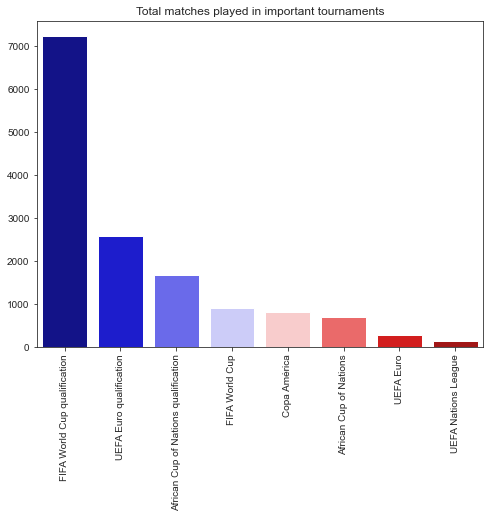

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.barplot(df_main['tournament'].value_counts().index,df_main['tournament'].value_counts().values, palette='seismic')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Total matches played in important tournaments',loc='center')

### Who won most matches in important tournaments

Text(0.5, 1.0, 'Most matches won in important tournaments')

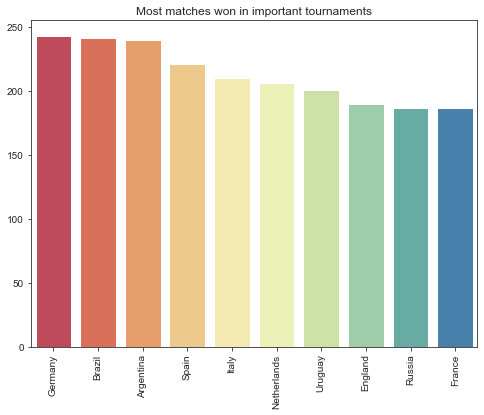

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.barplot(df_main['Winner'].value_counts().head(11)[1:].index,df_main['Winner'].value_counts().head(11)[1:].values, palette='Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Most matches won in important tournaments',loc='center')

### Teams won with most goals in important tournaments


Text(0.5, 1.0, 'Teams won with most goals in important tournaments')

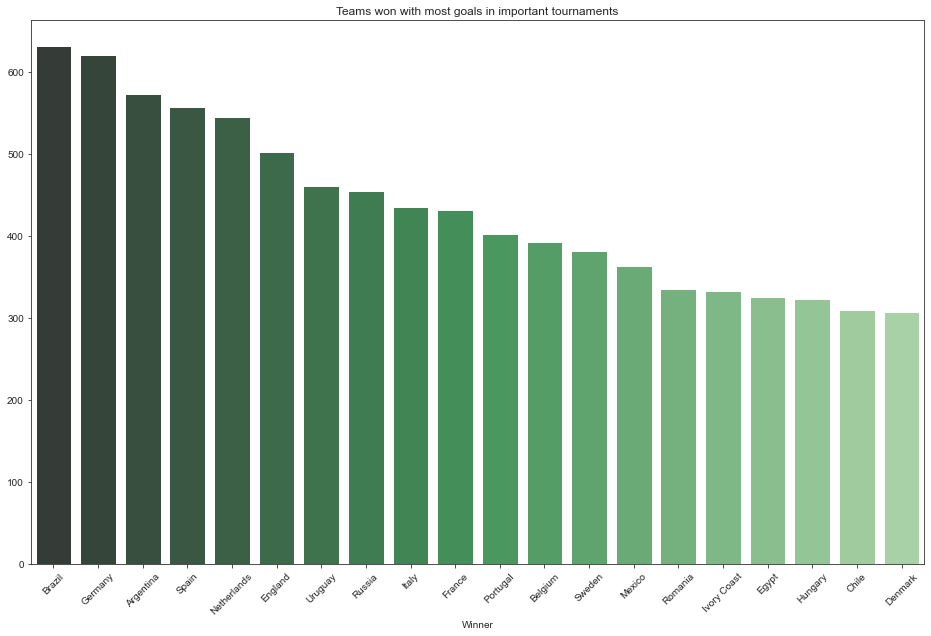

In [ ]:
table10 = pd.pivot_table(df_main, index=['Winner'], aggfunc=np.sum).sort_values(by=['Won_by_goals'],ascending=False)[['Total_goals','home_score','away_score','Won_by_goals','neutral']][:20]
plt.figure(figsize = (16,10))
ax = sns.barplot(table10.index,table10['Won_by_goals'].values, palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Teams won with most goals in important tournaments',loc='center')


### Mean value of Home and Away goals in important tournaments

In [ ]:
print(df_main[['home_score','away_score']].mean())


home_score    1.714475
away_score    1.081070
dtype: float64


### To understand relation bewteen Home/Away team won or Tie with plot


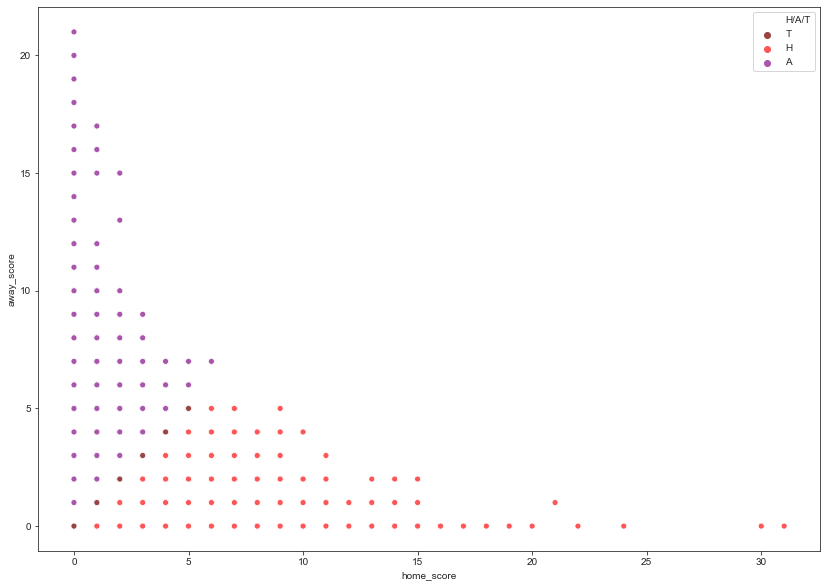

In [ ]:
plt.figure(figsize = (14,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="home_score", y="away_score", hue="H/A/T", palette='seismic_d', data=df)


### Home/Away goal difference


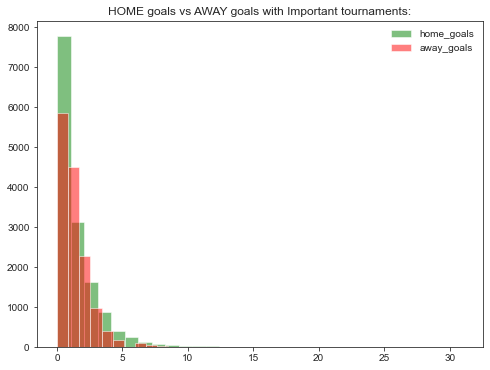

In [ ]:
plt.figure(figsize = (8,6))
df_main['home_score'].hist(bins=30,color='g',alpha=0.5,label='home_goals')
df_main['away_score'].hist(bins=20,color='r',alpha=0.5,label='away_goals')
plt.title('HOME goals vs AWAY goals with Important tournaments:', loc = 'center')
plt.legend(frameon=False,loc='upper right')
plt.grid(b=False)


# THE END